<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Adaboost_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=50,n_features=2,n_informative=2,n_redundant=0,
                          shift=0.86,random_state=47)

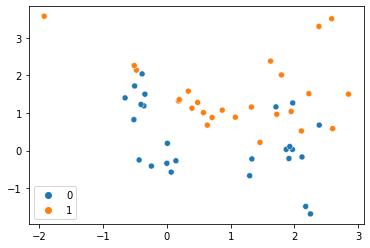

In [ ]:
# plot scatterplot

sns.scatterplot(X[:,0],X[:,1],data=X,hue=y)
plt.show()

In [ ]:
df = pd.DataFrame(X,columns=['x1','x2'])
df.head()

,x1,x2
0,0.068078,-0.571289
1,2.120322,-0.169097
2,-0.505112,1.719288
3,2.601269,0.585775
4,0.709856,0.881265


In [ ]:
# concat the target column with the dataframe

df = pd.concat([df,pd.Series(y,name='target')],axis=1)
df

,x1,x2,target
0,0.068078,-0.571289,0
1,2.120322,-0.169097,0
2,-0.505112,1.719288,0
3,2.601269,0.585775,1
4,0.709856,0.881265,1
5,2.110447,0.523300,1
6,-0.241780,-0.410699,0
7,0.181717,1.319300,1
8,0.484200,1.280143,1
9,1.299027,-0.668119,0


In [ ]:
# assign weights

def weights(df):
    df['weights'] = 1 / df.shape[0]
    return df

weights(df)

,x1,x2,target,weights
0,0.068078,-0.571289,0,0.02
1,2.120322,-0.169097,0,0.02
2,-0.505112,1.719288,0,0.02
3,2.601269,0.585775,1,0.02
4,0.709856,0.881265,1,0.02
5,2.110447,0.523300,1,0.02
6,-0.241780,-0.410699,0,0.02
7,0.181717,1.319300,1,0.02
8,0.484200,1.280143,1,0.02
9,1.299027,-0.668119,0,0.02


In [ ]:
from mlxtend.plotting import plot_decision_regions

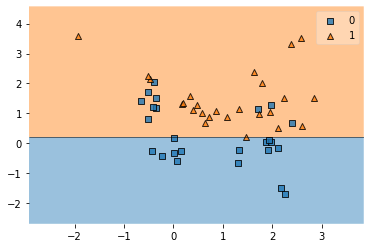

In [ ]:
# train a decision tree model with max_depth=1

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

def fit_predict(df):
    dt = DecisionTreeClassifier(max_depth=1)
    dt.fit(df.iloc[:,0:2],df['target'])
    plot_decision_regions(df.iloc[:,0:2].values,df['target'].values,dt)
    plt.show()
    df['y_pred'] = dt.predict(df.iloc[:,0:2])
    return df

df = fit_predict(df)

In [ ]:
df.head()

,x1,x2,target,weights,y_pred
0,0.068078,-0.571289,0,0.02,0
1,2.120322,-0.169097,0,0.02,0
2,-0.505112,1.719288,0,0.02,1
3,2.601269,0.585775,1,0.02,1
4,0.709856,0.881265,1,0.02,1


In [ ]:
# calculate the total errors made by the first stump

def calculate_errors(df):
    df['errors'] = abs(df['target']-df['y_pred'])
    return df['errors'].sum()

In [ ]:
calculate_errors(df)

10

The total error is calculated as not the absolute number of errors but the sum of weights of rows containing the errors.

In [ ]:
# calculate the total_error

def cal_total_error(df):
    temp_df = df[df['errors'] == 1]
    return temp_df['weights'].sum()

total_error = cal_total_error(df)

In [ ]:
total_error

0.19999999999999998

The performance of the stump is given by the formula:

$$Stump \ performance = \dfrac{1}{2} log(\dfrac{1-total \ error}{total \ error})$$

In [ ]:
# calculate the performance of the stump
def stump_performance(total_error):
    te = total_error + 0.0000000001
    return 0.5 * np.log((1-te)/te)

alpha = stump_performance(total_error)
alpha

0.6931471802474454

- The correctly classified weights are downsampled using this formula

$$weight \ update = weight * e^{-α}$$

- The misclassified weights are upsampled using this formula

$$weight \ update = weight * e^{α}$$

In [ ]:
# upsample the weights

def weight_change(df,alpha=alpha):
    if df['target'] == df['y_pred']:
        return df['weights'] * np.exp(-alpha)
    else:
        return df['weights'] * np.exp(alpha)

df['new_weights'] = df.apply(weight_change,axis=1)

In [ ]:
df

,x1,x2,target,weights,y_pred,errors,new_weights
0,0.068078,-0.571289,0,0.02,0,0,0.01
1,2.120322,-0.169097,0,0.02,0,0,0.01
2,-0.505112,1.719288,0,0.02,1,1,0.04
3,2.601269,0.585775,1,0.02,1,0,0.01
4,0.709856,0.881265,1,0.02,1,0,0.01
5,2.110447,0.523300,1,0.02,1,0,0.01
6,-0.241780,-0.410699,0,0.02,0,0,0.01
7,0.181717,1.319300,1,0.02,1,0,0.01
8,0.484200,1.280143,1,0.02,1,0,0.01
9,1.299027,-0.668119,0,0.02,0,0,0.01


In [ ]:
# normalize the updated weights column

def normalize(df):
    col_sum = df['new_weights'].sum()
    print('Sum of weights before normalization',col_sum)

    df['new_weights'] = df['new_weights'] / col_sum
    print('Sum of weights after normalization',df['new_weights'].sum())
    return df

In [ ]:
normalize(df)

Sum of weights before normalization 0.8
Sum of weights after normalization 1.0000000000000002


,x1,x2,target,weights,y_pred,errors,new_weights
0,0.068078,-0.571289,0,0.02,0,0,0.0125
1,2.120322,-0.169097,0,0.02,0,0,0.0125
2,-0.505112,1.719288,0,0.02,1,1,0.0500
3,2.601269,0.585775,1,0.02,1,0,0.0125
4,0.709856,0.881265,1,0.02,1,0,0.0125
5,2.110447,0.523300,1,0.02,1,0,0.0125
6,-0.241780,-0.410699,0,0.02,0,0,0.0125
7,0.181717,1.319300,1,0.02,1,0,0.0125
8,0.484200,1.280143,1,0.02,1,0,0.0125
9,1.299027,-0.668119,0,0.02,0,0,0.0125


In [ ]:
# create the upper and the lower ranges

def create_ranges(df):
    df['upper_bound'] = df['new_weights'].cumsum()
    df['lower_bound'] = df['upper_bound'] - df['new_weights']

    return df


create_ranges(df)

,x1,x2,target,weights,y_pred,errors,new_weights,upper_bound,lower_bound
0,0.068078,-0.571289,0,0.02,0,0,0.0125,0.0125,0.0000
1,2.120322,-0.169097,0,0.02,0,0,0.0125,0.0250,0.0125
2,-0.505112,1.719288,0,0.02,1,1,0.0500,0.0750,0.0250
3,2.601269,0.585775,1,0.02,1,0,0.0125,0.0875,0.0750
4,0.709856,0.881265,1,0.02,1,0,0.0125,0.1000,0.0875
5,2.110447,0.523300,1,0.02,1,0,0.0125,0.1125,0.1000
6,-0.241780,-0.410699,0,0.02,0,0,0.0125,0.1250,0.1125
7,0.181717,1.319300,1,0.02,1,0,0.0125,0.1375,0.1250
8,0.484200,1.280143,1,0.02,1,0,0.0125,0.1500,0.1375
9,1.299027,-0.668119,0,0.02,0,0,0.0125,0.1625,0.1500


In [ ]:
# select the upsampled rows

def selected_index(df):
    index = []
    for i in range(df.shape[0]):
        num = np.random.random()

        for ind,row in df.iterrows():
            if (num < row['upper_bound']) and (num > row['lower_bound']):
                index.append(ind)

    return index


new_index =selected_index(df)

In [ ]:
new_index

[49,
 28,
 22,
 45,
 34,
 33,
 18,
 15,
 20,
 33,
 12,
 30,
 30,
 45,
 46,
 14,
 15,
 15,
 20,
 11,
 42,
 6,
 0,
 48,
 38,
 15,
 39,
 23,
 42,
 13,
 47,
 42,
 15,
 24,
 2,
 33,
 49,
 23,
 30,
 40,
 45,
 35,
 49,
 29,
 2,
 23,
 2,
 40,
 44,
 42]

In [ ]:
df.columns

Index(['x1', 'x2', 'target', 'weights', 'y_pred', 'errors', 'new_weights',
       'upper_bound', 'lower_bound'],
      dtype='object')

In [ ]:
new_df = df.iloc[new_index,0:4]
new_df.reset_index(drop=True,inplace=True)
new_df

,x1,x2,target,weights
0,1.711645,1.163726,0,0.02
1,0.574518,1.011378,1,0.02
2,1.929093,0.109538,0,0.02
3,-0.387660,2.040330,0,0.02
4,2.178587,-1.484239,0,0.02
5,1.724563,0.968084,1,0.02
6,1.460875,0.219095,1,0.02
7,1.974655,1.267502,0,0.02
8,-0.477103,2.140093,1,0.02
9,1.724563,0.968084,1,0.02


In [ ]:
X,y = make_classification(n_samples=50,n_features=2,n_informative=2,n_redundant=0,
                          shift=0.86,random_state=47)
    
df = pd.DataFrame(X,columns=['x1','x2'])

df = pd.concat([df,pd.Series(y,name='target')],axis=1)

df = weights(df)

def my_adaboost(n_estimators,df):
    for i in range(n_estimators):
        # fit the model
        df = fit_predict(df)

        # calculate errors on y_pred
        err = calculate_errors(df)
        print('Number of misclassifications done by model are',err)

        #calculate total errors 
        total_error = cal_total_error(df)
        
        # calculate the stump performance
        alpha = stump_performance(total_error)
        print('The stump performance is ',alpha)

        # update the weights based on stump performance
        df['new_weights'] = df.apply(weight_change,axis=1)

        # Normalize the updated weights
        normalize(df)

        # create the upper and lower_bound ranges
        create_ranges(df)

        # get the upsampled index values for new df
        new_index = selected_index(df)

        # make new_df
        new_df = df.iloc[new_index,0:4]
        new_df.reset_index(drop=True,inplace=True)

        df = new_df

    

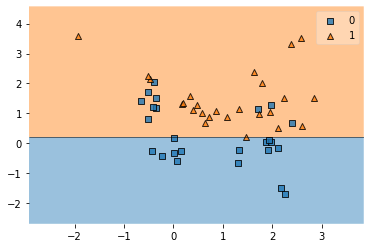

Number of misclassifications done by model are 10
The stump performance is  0.6931471802474454
Sum of weights before normalization 0.8
Sum of weights after normalization 1.0000000000000002


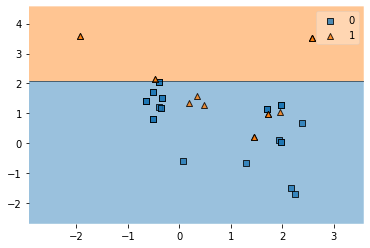

Number of misclassifications done by model are 10
The stump performance is  0.6931471802474454
Sum of weights before normalization 0.8
Sum of weights after normalization 1.0


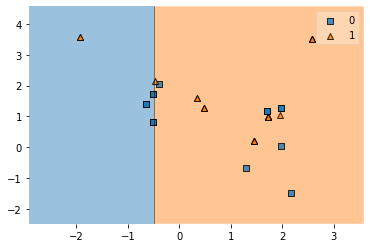

Number of misclassifications done by model are 13
The stump performance is  0.5229842773314687
Sum of weights before normalization 0.8899999999531251
Sum of weights after normalization 1.0000000000000002


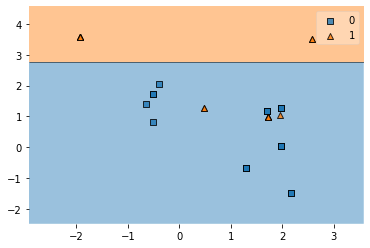

Number of misclassifications done by model are 9
The stump performance is  0.7581737443452908
Sum of weights before normalization 0.770000000015625
Sum of weights after normalization 1.0000000000000002


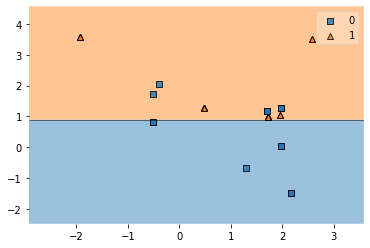

Number of misclassifications done by model are 8
The stump performance is  0.8291140379297424
Sum of weights before normalization 0.7400000000312499
Sum of weights after normalization 1.0000000000000002


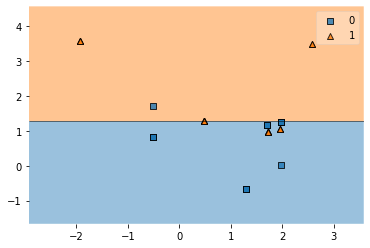

Number of misclassifications done by model are 14
The stump performance is  0.4722308041724098
Sum of weights before normalization 0.9199999999375001
Sum of weights after normalization 0.9999999999999998


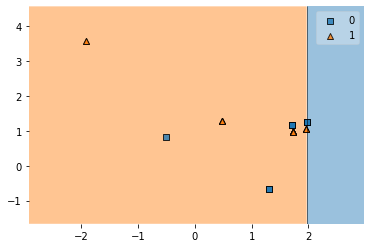

Number of misclassifications done by model are 8
The stump performance is  0.8291140379297424
Sum of weights before normalization 0.7400000000312499
Sum of weights after normalization 1.0000000000000002


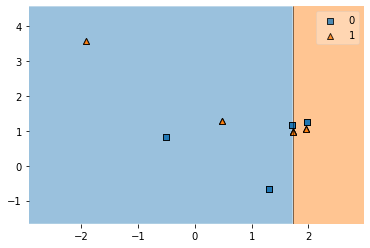

Number of misclassifications done by model are 8
The stump performance is  0.8291140379297424
Sum of weights before normalization 0.74000000003125
Sum of weights after normalization 1.0


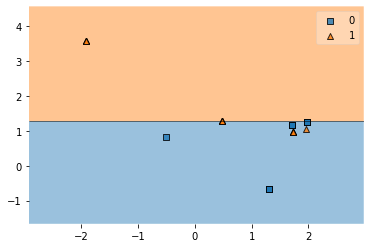

Number of misclassifications done by model are 8
The stump performance is  0.8291140379297424
Sum of weights before normalization 0.7400000000312499
Sum of weights after normalization 1.0000000000000002


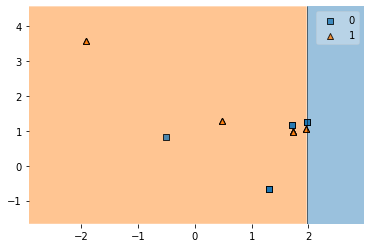

Number of misclassifications done by model are 10
The stump performance is  0.6931471802474454
Sum of weights before normalization 0.8
Sum of weights after normalization 1.0


In [ ]:
my_adaboost(10,df)